In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.random.rand(10)*10
y=2*x + np.random.randn(10)


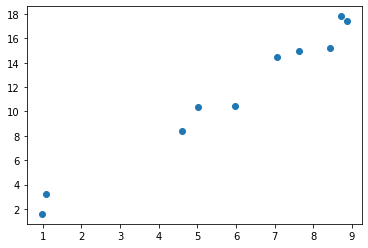

In [2]:
plt.scatter(x,y)

In [13]:
X=x[:,np.newaxis]
print(X.shape)
#y.shape

(100, 1, 1)


[1.91140587] 0.2345463811038062


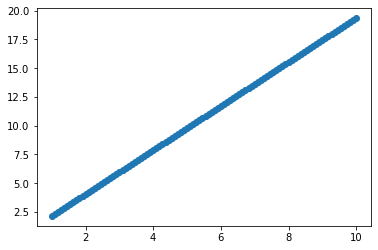

In [4]:
# Model dùng sklearn
from sklearn.linear_model import LinearRegression as lr
model =lr(fit_intercept=True)
model.fit(X,y)
print(model.coef_,model.intercept_)
x=np.linspace(1,10, 100)
x=x[:,np.newaxis]
y=model.predict(x)
plt.scatter(x,y)

In [5]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/sonrasa2k/hongtin_dudoangianha/master/Real%20estate.csv")
#data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
names = ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']
X_train = data[names]
print(X_train.shape)
#Y_train= data['Y house price of unit area']
#Y_train.shape
#model.fit(X_train,Y_train)
#print(model.coef_)

[ 5.14622746e+00 -2.69695448e-01 -4.48746107e-03  1.13327690e+00
  2.25472976e+02 -1.24236012e+01]


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# 2. Build model 
model_kr = keras.Sequential()
model_kr.add(layers.Dense(1, input_shape=(6,)))
model_kr.add(layers.Activation('linear'))

In [9]:
# 3. gradient descent optimizer and loss functio
opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.0001)
model_kr.compile(loss='mse', optimizer=opt)

In [12]:
model_kr.fit(X_train, Y_train, epochs=600, batch_size=50)

Epoch 1/600
9/9 [==============================] - 0s 2ms/step - loss: 202.8479
Epoch 2/600
9/9 [==============================] - 0s 2ms/step - loss: 202.7212
Epoch 3/600
9/9 [==============================] - 0s 2ms/step - loss: 202.6106
Epoch 4/600
9/9 [==============================] - 0s 3ms/step - loss: 202.4771
Epoch 5/600
9/9 [==============================] - 0s 2ms/step - loss: 202.3630
Epoch 6/600
9/9 [==============================] - 0s 2ms/step - loss: 202.2411
Epoch 7/600
9/9 [==============================] - 0s 2ms/step - loss: 202.1337
Epoch 8/600
9/9 [==============================] - 0s 2ms/step - loss: 202.1203
Epoch 9/600
9/9 [==============================] - 0s 3ms/step - loss: 201.8714
Epoch 10/600
9/9 [==============================] - 0s 3ms/step - loss: 201.8378
Epoch 11/600
9/9 [==============================] - 0s 3ms/step - loss: 201.6538
Epoch 12/600
9/9 [==============================] - 0s 3ms/step - loss: 201.5237
Epoch 13/600
9/9 [===================

In [11]:
#print(type(X_train))
x_t=X_train.iloc[1,:].to_numpy()
x_t=x_t[np.newaxis,:]
print(x_t.shape)
print(model_kr.predict(x_t))
print(model.predict(x_t))
print(model_kr.get_weights())
print(model.coef_)


(1, 6)
[[46.608856]]
[47.82573429]
[array([[-0.0642412 ],
       [ 0.7005679 ],
       [-0.00676407],
       [ 0.4529027 ],
       [ 0.08659075],
       [ 1.2938417 ]], dtype=float32), array([0.841743], dtype=float32)]
[ 5.14622746e+00 -2.69695448e-01 -4.48746107e-03  1.13327690e+00
  2.25472976e+02 -1.24236012e+01]
